In [129]:
import numpy as np
import pandas as pd
import datetime
from time import time
import math
from os import listdir
from os.path import isfile, join
import json
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
from scipy.stats import cauchy

In [350]:
monthly=pd.read_csv('../output/dam_monthly.csv')

In [351]:
monthly['day']=1
monthly['date']=pd.to_datetime(monthly[['year', 'month', 'day']])
monthly=monthly.set_index('date')[:pd.to_datetime('2020-03-31')]
monthly

,year,month,volume_mean,value_mean,price_max,price_min,price_mean,power_max,power_min,power_mean,...,days,off_price_diff,morning_price_diff,standard_price_diff,evening_price_diff,off_price_log_diff,morning_price_log_diff,standard_price_log_diff,evening_price_log_diff,day
date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,2016,1,3785.351613,211930.289323,106.684000,45.982500,82.458788,362.651613,17.606452,159.959113,...,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2016-02-01,2016,2,3871.755172,261082.316897,123.798500,75.023333,91.797506,367.334483,23.231034,161.993793,...,29,4.414413,16.240794,10.682915,-3.517619,0.034835,0.059036,0.043657,-0.010675,1
2016-03-01,2016,3,2904.254839,187713.287290,108.651500,60.115833,88.953989,285.867742,18.232258,122.263199,...,31,-1.813562,-4.502277,-3.638148,-9.457640,-0.013975,-0.015578,-0.014380,-0.030073,1
2016-04-01,2016,4,1921.116667,118965.331100,114.641667,42.853500,85.579278,183.970000,7.236667,80.344000,...,30,-2.153111,-12.993913,-0.555251,8.748116,-0.017197,-0.048373,-0.002237,0.027888,1
2016-05-01,2016,5,1597.551613,89924.522194,105.676500,28.659583,79.317876,165.183871,4.661290,68.442769,...,31,-8.475135,5.083182,-4.592882,-2.635833,-0.075200,0.019570,-0.018961,-0.008216,1
2016-06-01,2016,6,2885.403333,182047.067533,108.813000,68.994167,93.834178,302.863333,8.116667,121.125500,...,30,12.100361,15.754091,10.500655,6.970833,0.103775,0.055591,0.042194,0.021399,1
2016-07-01,2016,7,2769.425806,187426.964161,119.204500,69.865000,97.535398,276.548387,13.464516,117.648925,...,31,1.619829,16.381140,5.437856,18.916429,0.012184,0.051126,0.020339,0.053259,1
2016-08-01,2016,8,4413.629032,279116.342548,129.452500,22.602917,100.931723,445.296774,17.209677,185.842151,...,31,-7.029767,5.907819,5.730597,14.554369,-0.055549,0.017055,0.020450,0.036947,1
2016-09-01,2016,9,5547.426667,339186.325000,110.714583,54.918333,92.157114,518.670000,35.463333,232.380972,...,30,0.428225,-23.140777,-13.216265,4.445415,0.003595,-0.071012,-0.048702,0.010686,1


In [355]:
standard = monthly['standard_price_mean']
standard=standard.asfreq(pd.infer_freq(standard.index))
standard

date
2016-01-01    101.019750
2016-02-01    111.702665
2016-03-01    108.064517
2016-04-01    107.509266
2016-05-01    102.916384
2016-06-01    113.417038
2016-07-01    118.854894
2016-08-01    124.585491
2016-09-01    111.369226
2016-10-01     79.478596
2016-11-01     79.339451
2016-12-01     68.240707
2017-01-01     69.869600
2017-02-01     62.510357
2017-03-01     47.108783
2017-04-01     50.223179
2017-05-01     62.928153
2017-06-01     65.604452
2017-07-01     61.281356
2017-08-01     66.326602
2017-09-01     62.944276
2017-10-01     62.036833
2017-11-01     62.226499
2017-12-01     60.834101
2018-01-01     66.010342
2018-02-01     63.900363
2018-03-01     52.201140
2018-04-01     47.327039
2018-05-01     40.182439
2018-06-01     66.356106
2018-07-01     79.212356
2018-08-01     67.970880
2018-09-01     58.362062
2018-10-01     61.989351
2018-11-01     67.331958
2018-12-01     61.362772
2019-01-01     53.378009
2019-02-01     63.527484
2019-03-01     62.405524
2019-04-01     70.77

In [356]:
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

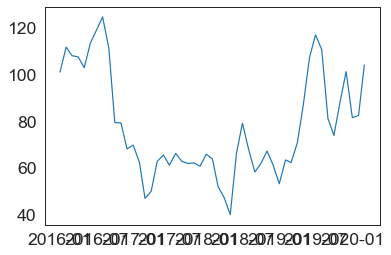

In [357]:
plt.plot(standard)

In [400]:
standard_diff=monthly.drop(pd.to_datetime('2016-01-01'))['standard_price_diff']
standard_diff=standard_diff.asfreq(pd.infer_freq(standard.index))


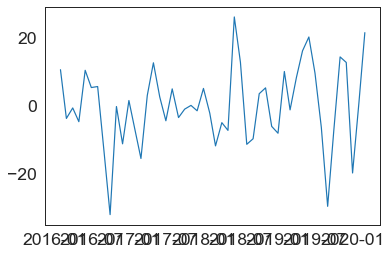

In [359]:
plt.plot(standard_diff)

In [360]:
perform_adf_test(monthly['standard_price_mean'])

ADF Statistic: -1.727491
p-value: 0.417007


In [361]:
perform_adf_test(standard_diff)

ADF Statistic: -6.058486
p-value: 0.000000


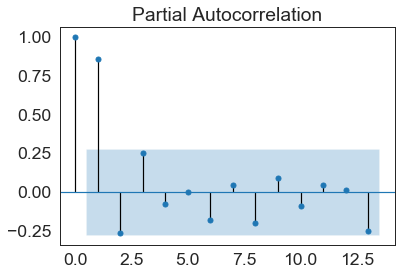

In [362]:
a=plot_pacf(monthly['standard_price_mean'], lags=13)

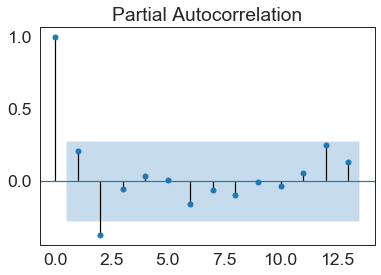

In [363]:
a=plot_pacf(standard_diff, lags=13)

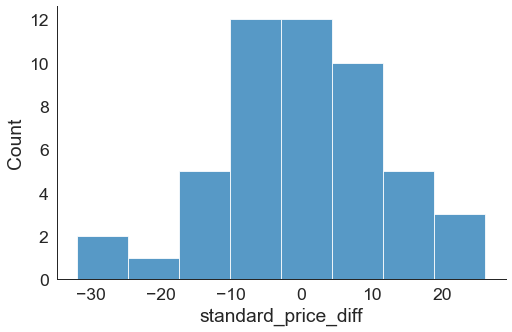

In [364]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=standard_diff, kind="hist", aspect = 1.5)

,sumsquare_error,aic,bic,kl_div
norm,0.048415,892.776124,-339.174049,inf


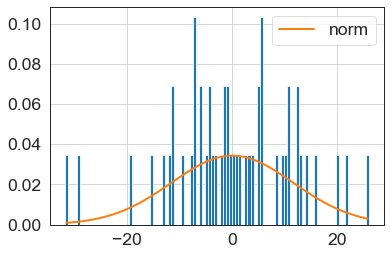

In [365]:
f = Fitter(standard_diff, distributions=['norm'])
f.fit()
f.summary()

In [368]:
scale=f.get_best(method = 'sumsquare_error')['norm']['scale']#
scale

11.616252840923776

In [386]:
mu=standard.mean()
mu

77.99410194196871

## MA

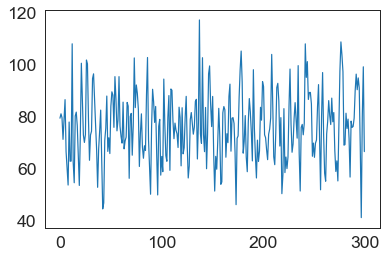

In [390]:
forecast = pd.DataFrame(index=pd.date_range(start='2023-01-01', end='2047-12-31', freq='M'))
forecast = forecast.reset_index()
forecast.at[0, 'f']=mu
forecast['error']=np.random.normal(scale=scale, size=300)
for index in range(len(forecast.index)):
    forecast.at[index,'f1']=forecast.iloc[index]['f']+forecast.iloc[index]['error']
    if index<len(forecast.index)-1: 
        forecast.at[index+1,'f']=mu+0.5*forecast.iloc[index]['error']
plt.plot(forecast['f1'])

## AR(1)

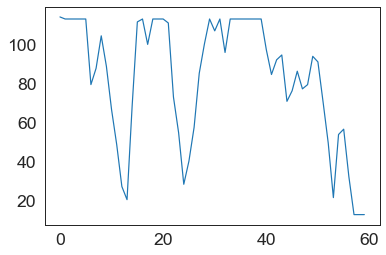

In [432]:
phi = 0.99
forecast2 = pd.DataFrame(index=pd.date_range(start='2023-01-01', end='2027-12-31', freq='M'))
forecast2['error']=np.random.normal(scale=17.36, size=5*12)
forecast2=forecast2.reset_index()
forecast2.loc[0,'value']=phi*forecast2.loc[0,'error']
for index in range(len(forecast2.index)):
    if index>0: 
        forecast2.at[index,'dist'] = min(max((phi * forecast2.iloc[index-1]['dist']) + forecast2.iloc[index]['error'],-65),35)
    else:
        forecast2.at[index,'dist'] = forecast2.iloc[index]['error']
    forecast2.at[index,'value']=mu + forecast2.iloc[index]['dist']

plt.plot(forecast2['value'])

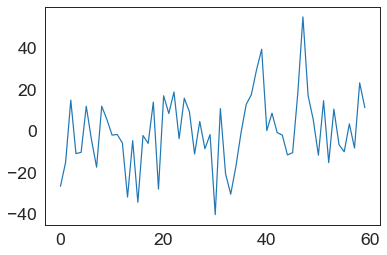

In [398]:
plt.plot(forecast2['error'])

##### 